In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

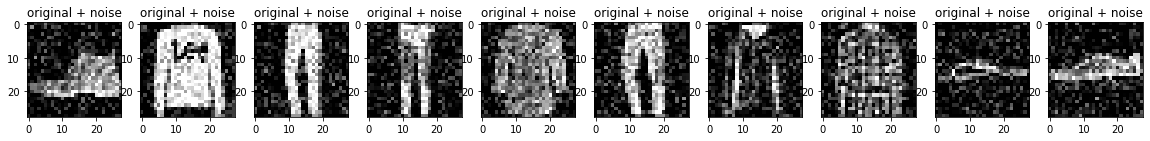

In [5]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

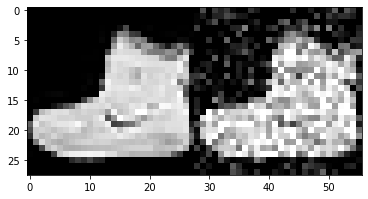

In [6]:
plt.imshow (np.concatenate( [x_train[0], x_train_noisy[0] ], axis = 1 ) ) 
plt.show()


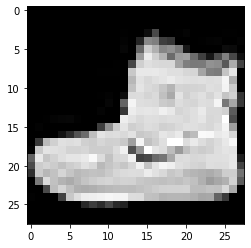

In [7]:
# 흑백이미지를 컬러로 변경(1채널을 3채널로 변경)
#노이즈 추가하기전에 작업함
# 내자료 가지고 할때 컬러이미지 하고싶어서

from skimage import color
x_train_color = [color.gray2rgb(x) for x in x_train]
x_test_color = [color.gray2rgb(x) for x in x_test]
#np.shape(x_train[0]), np.shape(color.gray2rgb(x_train[0])) #컬러 변경 
x_train_color[0] #검정과 흰색으로만 들어간다
plt.imshow(x_train_color[0]) # 여기다가 노이즈 추가

In [8]:
x_train[0].shape

(28, 28)

In [9]:
np.shape(x_train_color)

(60000, 28, 28, 3)

In [10]:
noise_factor = 0.2
x_train_noisy = x_train_color + noise_factor * tf.random.normal(shape=np.shape(x_train_color)) 
x_test_noisy = x_test_color + noise_factor * tf.random.normal(shape=np.shape(x_test_color)) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

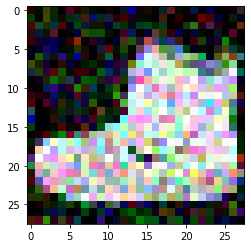

In [11]:
plt.imshow(x_train_noisy[0])

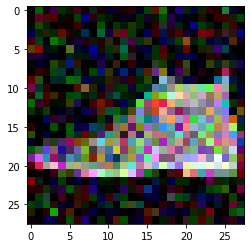

In [12]:
plt.imshow(x_test_noisy[0])

In [13]:
from keras.layers import Dense, Input, Conv2D, Conv2DTranspose, Flatten, Reshape
from keras.models import Model

inputs = Input(shape=(28, 28, 3)) #컬러이기때문
x = Conv2D(32, 3, 2, activation='relu', padding='same')(inputs)
x = Conv2D(64, 3, 2, activation='relu', padding='same')(x)
x = Flatten()(x)
latent = Dense(10)(x)

x = Dense(7 * 7 * 64)(latent)

x = Reshape((7, 7, 64))(x)

x = Conv2DTranspose(64, 3, 2, activation='relu', padding='same')(x)
x = Conv2DTranspose(32, 3, 2, activation='relu', padding='same')(x)
x = Conv2DTranspose(3, 3, activation='sigmoid', padding='same')(x) # 컬러이기 떄문에 3개

model = Model(inputs, x)


In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                31370     
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              34496     
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0     

In [17]:
np.shape(x_train_noisy), np.shape(x_train_color)

(TensorShape([60000, 28, 28, 3]), (60000, 28, 28, 3))

In [18]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
hist = model.fit(np.array(x_train_noisy), np.array(x_train_color), validation_data=(np.array(x_test_noisy), np.array(x_test_color)), epochs=5, verbose=2)


Epoch 1/5
1875/1875 - 114s - loss: 0.0223 - accuracy: 0.4119 - val_loss: 0.0156 - val_accuracy: 0.4565
Epoch 2/5
1875/1875 - 120s - loss: 0.0146 - accuracy: 0.4499 - val_loss: 0.0139 - val_accuracy: 0.4128
Epoch 3/5
1875/1875 - 121s - loss: 0.0135 - accuracy: 0.3410 - val_loss: 0.0132 - val_accuracy: 0.3049
Epoch 4/5
1875/1875 - 124s - loss: 0.0130 - accuracy: 0.2906 - val_loss: 0.0131 - val_accuracy: 0.2743
Epoch 5/5
1875/1875 - 116s - loss: 0.0127 - accuracy: 0.3025 - val_loss: 0.0128 - val_accuracy: 0.3229


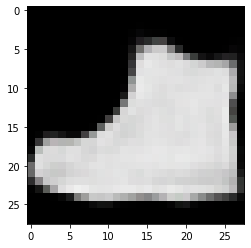

In [23]:
a = model.predict(x_train_color[0].reshape(1,28,28,3))
plt.imshow(a[0])